In [104]:
import pandas as pd
import numpy as np

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [106]:
df = pd.read_csv('CreditScoring.csv')
df.sample(10)

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
815,1,3,2,48,48,2,1,3,45,100,4000,0,1600,2600
95,1,3,2,36,41,2,1,3,75,200,3000,0,1000,1000
3839,1,2,5,60,24,1,1,1,35,164,0,0,900,1516
3157,1,13,3,60,40,2,1,1,60,100,3500,540,970,1270
2933,1,28,2,24,49,2,1,1,35,73,2700,0,400,500
1212,2,4,5,60,38,4,1,1,35,100,0,0,1300,1500
3355,1,0,2,60,56,2,1,1,45,150,10000,0,1000,1798
3864,1,8,2,12,39,2,1,1,75,160,1500,0,360,865
895,1,5,1,36,37,2,1,1,74,138,0,0,900,1358
2711,1,3,2,60,27,2,1,3,45,21,4000,0,1050,1064


In [107]:
df.columns = df.columns.str.lower()
df.columns

Index(['status', 'seniority', 'home', 'time', 'age', 'marital', 'records',
       'job', 'expenses', 'income', 'assets', 'debt', 'amount', 'price'],
      dtype='object')

In [108]:
df.status.unique()

array([1, 2, 0], dtype=int64)

Although most columns are numerical, some are categorical: status, home, marital, records and job. We need to translate them to their actual names

In [109]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

In [110]:
df.status = df.status.map(status_values)

In [111]:
df.sample(10)

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
3057,ok,29,2,48,60,2,1,1,35,152,3500,0,1050,1550
3578,default,11,6,60,48,2,1,1,75,225,0,0,1300,1550
959,default,1,5,36,33,1,1,1,35,125,0,0,600,1600
809,default,2,1,48,31,2,1,3,102,268,0,0,1400,1635
3072,default,0,5,60,22,1,1,2,35,49,0,0,1250,1316
1063,ok,3,2,24,46,2,1,3,75,500,14000,0,500,1095
903,ok,13,2,60,40,2,1,1,90,130,3000,0,800,860
2685,default,1,2,60,40,2,1,3,35,349,6000,4000,1300,1511
3466,ok,2,2,60,40,2,1,3,75,67,25000,0,1800,2287
1973,default,0,2,24,58,2,2,1,45,150,4000,0,600,1607


In [112]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

In [113]:
df.home = df.home.map(home_values)
df.sample(5)

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
57,ok,4,parents,30,27,1,1,1,45,100,5000,0,500,1048
2144,default,1,parents,60,22,1,1,1,35,45,0,0,1350,1520
2807,ok,0,owner,18,26,1,1,4,35,85,7500,2600,600,1290
397,default,1,private,48,34,2,2,3,45,200,3000,1500,1000,1191
2693,ok,10,other,42,26,1,1,1,35,67,0,0,800,1400


In [114]:
marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

In [115]:
df.marital = df.marital.map(marital_values)
df.sample(5)

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
473,ok,0,other,60,26,married,1,2,45,68,0,0,1200,1315
3248,ok,1,parents,60,25,married,1,1,35,140,0,0,2000,2100
833,default,1,parents,36,23,single,1,2,35,75,0,0,350,425
4401,ok,1,private,60,24,single,1,1,35,174,7000,6500,950,1468
2991,ok,4,other,48,20,single,1,1,35,245,0,0,1126,1631


In [116]:
records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

In [117]:
df.records = df.records.map(records_values)
df.sample(5)

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
1934,ok,3,owner,48,25,single,no,1,35,125,4000,0,1000,1301
1057,ok,14,owner,60,39,married,no,1,105,129,3500,1200,750,1888
281,ok,8,private,36,39,married,no,1,75,128,2500,0,550,550
894,ok,15,rent,60,37,married,no,1,58,134,500,0,900,1333
1770,ok,3,rent,48,51,married,no,3,90,99999999,0,0,1200,1240


In [118]:
job_values = {
    1: 'fixed',
    2: 'parttime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

In [119]:
df.job = df.job.map(job_values)
df.sample(5)

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
1757,default,0,rent,36,32,married,no,freelance,89,285,0,0,1000,1304
1709,ok,4,parents,48,21,single,no,fixed,35,88,25000,0,1100,1200
137,default,1,rent,60,37,single,no,fixed,45,100,0,0,1150,1555
3608,ok,28,owner,36,46,married,no,fixed,75,170,6000,0,750,800
4283,ok,0,parents,48,23,single,no,fixed,35,56,0,0,325,1202


In [120]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


The max value in income assets, etc is 99999999. It seems like an artificial value. Lets replace this big number with NaN for these respective columns

In [121]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

In [122]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [123]:
df.status.value_counts()

ok         3200
default    1254
unk           1
Name: status, dtype: int64

Notice that there is one row with "unknown" status: we don't know whether or not this client managed to pay back the loan. This row seems like it is not useful so let's remove it.

In [124]:
df = df[df.status != 'unk']

In [125]:
df.status.value_counts()

ok         3200
default    1254
Name: status, dtype: int64

Splitting the data

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=11)

In [128]:
df_train_full

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
3669,ok,22,owner,48,48,married,no,fixed,60,110.0,3000.0,0.0,1000,1460
2540,default,8,other,60,41,married,no,freelance,45,62.0,0.0,0.0,1800,2101
279,ok,2,parents,36,19,married,no,fixed,35,162.0,4000.0,100.0,400,570
3537,ok,1,owner,12,61,married,no,others,45,103.0,20000.0,0.0,300,650
3867,ok,13,owner,60,27,married,no,fixed,35,253.0,7000.0,0.0,1060,1750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,default,4,owner,60,47,married,no,freelance,75,0.0,13500.0,0.0,1900,1976
1293,ok,2,rent,60,28,single,no,fixed,45,101.0,0.0,0.0,1300,1333
4024,ok,2,parents,36,25,single,no,fixed,35,110.0,0.0,0.0,500,1200
3776,ok,4,other,60,25,single,no,fixed,35,162.0,0.0,0.0,1800,2999


In [129]:
df_test

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
1207,default,3,owner,36,26,single,no,freelance,35,0.0,60000.0,3000.0,800,1000
1734,ok,10,rent,60,28,married,no,fixed,78,325.0,18.0,3000.0,2250,2250
3750,ok,14,rent,60,41,married,no,fixed,53,181.0,0.0,0.0,1150,2497
4246,ok,4,owner,60,39,married,no,freelance,45,0.0,7500.0,0.0,1300,1508
2227,default,1,other,30,20,single,no,fixed,35,90.0,0.0,0.0,450,500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,ok,19,owner,12,42,married,no,fixed,90,464.0,5000.0,0.0,1100,2413
1616,ok,7,owner,36,24,married,no,fixed,45,95.0,3000.0,0.0,1000,1597
1670,ok,0,owner,24,28,married,no,parttime,45,219.0,6000.0,0.0,600,943
1742,default,8,other,36,30,married,yes,freelance,75,100.0,4000.0,1365.0,1220,1745


In [130]:
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=11)

In [131]:
len(df_train), len(df_val), len(df_test)

(2672, 891, 891)

In [132]:
y_train = (df_train.status == 'default').values
y_train

array([ True,  True, False, ..., False, False, False])

In [133]:
y_val = (df_val.status == 'default').values
y_val

array([False, False, False,  True, False,  True, False,  True, False,
       False, False,  True,  True, False,  True,  True, False,  True,
       False,  True, False,  True, False, False,  True,  True,  True,
       False,  True, False,  True, False, False, False, False, False,
        True,  True,  True,  True, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False,  True,
        True,  True, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False,  True, False, False, False,  True,  True, False, False,
        True,  True, False, False, False,  True, False,  True, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False,  True, False,  True, False,  True, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
        True,  True,

In [134]:
del df_train['status']
del df_val['status']

In [135]:
# from initial analysis, our data contains missing values-
# we added these NaNs ourselves. Replace the missing values
# with zero
df_train = df_train.fillna(0)
df_train

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
951,10,owner,36,36,married,no,freelance,75,0.0,10000.0,0.0,1000,1400
688,6,parents,48,32,single,yes,fixed,35,85.0,0.0,0.0,1100,1330
2233,1,parents,48,40,married,no,fixed,75,121.0,0.0,0.0,1320,1600
3304,1,parents,48,23,single,no,parttime,35,72.0,0.0,0.0,1078,1079
2271,5,owner,36,46,married,no,freelance,60,100.0,4000.0,0.0,1100,1897
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2382,18,private,36,45,married,no,fixed,45,220.0,20000.0,0.0,800,1600
1784,7,private,60,29,married,no,fixed,60,51.0,3500.0,500.0,1000,1290
808,1,parents,24,19,single,no,fixed,35,28.0,0.0,0.0,400,600
1857,15,owner,48,43,married,no,freelance,60,100.0,18000.0,0.0,2500,2976


In [136]:
df_val = df_val.fillna(0)
df_val

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
2404,6,rent,36,31,separated,no,fixed,49,140.0,0.0,0.0,550,999
908,18,rent,60,38,married,no,fixed,56,108.0,0.0,0.0,1000,1307
2464,17,rent,24,40,married,yes,fixed,58,128.0,0.0,0.0,700,982
1663,2,other,48,29,married,no,fixed,75,96.0,6000.0,3000.0,1200,1521
1518,25,rent,42,61,married,no,fixed,57,121.0,0.0,0.0,750,830
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968,0,owner,12,21,single,no,fixed,35,147.0,1500.0,0.0,350,350
4371,12,owner,60,45,married,no,fixed,75,131.0,5000.0,0.0,1150,1452
1324,2,owner,60,36,married,yes,freelance,60,140.0,29000.0,0.0,3900,4812
4081,3,parents,24,25,single,yes,fixed,35,128.0,0.0,0.0,300,1397


In [137]:
# to use categorical variables, we need to encode them. 
# use DictVectorizer from scikit-learn
# DictVectorizer needs a list of dictionaries, so first convert
# the dataframe into this format
dict_train = df_train.to_dict(orient='records')
dict_val = df_val.to_dict(orient='records')

In [138]:
from sklearn.feature_extraction import DictVectorizer

In [139]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(dict_train)
X_val = dv.transform(dict_val)

Decision trees

In [140]:
from sklearn.tree import DecisionTreeClassifier

In [141]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [142]:
from sklearn.metrics import roc_auc_score

In [143]:
y_pred = dt.predict_proba(X_train)[:, 1]
y_pred

array([1., 1., 0., ..., 0., 0., 0.])

In [144]:
roc_auc_score(y_train, y_pred)

1.0

In [145]:
# we see that the score is 100% - the perfect score.
# Let's check the score on validation before jumping to conclusions
y_pred = dt.predict_proba(X_val)[:, 1]
y_pred

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0.

In [147]:
roc_auc_score(y_val, y_pred)

0.6692529849119663

In [148]:
# Model is overfitting as the tree learned the training data so well
# that is simply memorized the outcome for each customer. However,
# when we applied it to the validation set, the model failed.

In [149]:
# change the depth of tree to make the model less complex
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [150]:
# to visualize the tree use export_text
from sklearn.tree import export_text
tree_text = export_text(dt, feature_names=dv.feature_names_)
print(tree_text)

|--- records=yes <= 0.50
|   |--- job=parttime <= 0.50
|   |   |--- class: False
|   |--- job=parttime >  0.50
|   |   |--- class: True
|--- records=yes >  0.50
|   |--- seniority <= 6.50
|   |   |--- class: True
|   |--- seniority >  6.50
|   |   |--- class: False



In [151]:
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train auc', auc)

train auc 0.7054989859726213


In [152]:
y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('validation auc', auc)

validation auc 0.6685264343319367


In [153]:
# Parameter tuning for decision tree
# we start by tuning max_depth. For that, we iterate over
# a few reasonable values and see what works best
# The value None means that there is no restriction on depth and
# the tree will grow as large as it can.
for depth in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.606
   2 -> 0.669
   3 -> 0.739
   4 -> 0.761
   5 -> 0.766
   6 -> 0.746
  10 -> 0.675
  15 -> 0.650
  20 -> 0.644
None -> 0.649


In [154]:
# we tune min_leaf_size. For this, we iterate over the threee best
# parameters of max_depth, and for each, go over different values of
# min_leaf_size.
for m in [4, 5, 6]:
    print('depth: %s' % m)
    for s in [1, 5, 10, 15, 20, 50, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=m, min_samples_leaf=s)
        dt.fit(X_train, y_train)
        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (s, auc))
    print()


depth: 4
1 -> 0.761
5 -> 0.761
10 -> 0.761
15 -> 0.764
20 -> 0.761
50 -> 0.753
100 -> 0.756
200 -> 0.747

depth: 5
1 -> 0.766
5 -> 0.768
10 -> 0.762
15 -> 0.772
20 -> 0.774
50 -> 0.767
100 -> 0.763
200 -> 0.759

depth: 6
1 -> 0.747
5 -> 0.762
10 -> 0.778
15 -> 0.786
20 -> 0.774
50 -> 0.770
100 -> 0.776
200 -> 0.768



In [155]:
# After running it, we see that the best AUC is 78.5% with parameters
# min_sample_leaf=15 and max_depth=6

In [157]:
# Use the best parameters to train the final model
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [158]:
y_pred = dt.predict_proba(X_train)[:, 1]
y_pred

array([0.11904762, 0.84285714, 0.20333333, ..., 0.30215827, 0.09486166,
       0.12765957])

In [159]:
auc = roc_auc_score(y_train, y_pred)
print('train auc', auc)

train auc 0.8612437327474509


In [161]:
y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('validation auc', auc)

validation auc 0.7850954203095104


Random Forest

In [162]:
from sklearn.ensemble import RandomForestClassifier

In [163]:
# when training a model, we need to specify the number of trees
# we want to have in the ensemble
rf = RandomForestClassifier(n_estimators=10)
rf

RandomForestClassifier(n_estimators=10)

In [164]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [165]:
y_pred = rf.predict_proba(X_val)[:, 1]
y_pred

array([0. , 0. , 0.1, 0.2, 0.1, 0.3, 0. , 0.8, 0.1, 0. , 0.2, 0.9, 0.3,
       0. , 0.2, 0.7, 0.1, 0.6, 0.1, 0.2, 0. , 0.2, 0. , 0.3, 0.7, 0.2,
       0.8, 0.1, 0.7, 0.1, 0.8, 0.5, 0.3, 0.5, 0. , 0.1, 0.7, 0.5, 0.5,
       0.6, 0.1, 0.9, 0. , 0.7, 0. , 0.1, 0.6, 0. , 0. , 0.1, 0. , 0.1,
       0.1, 0.4, 0.6, 0.6, 0. , 0.1, 0.1, 0. , 0.1, 0.3, 0.3, 0.3, 0. ,
       0.2, 0.2, 0. , 0. , 0.1, 0.3, 0.1, 0. , 0.1, 0.2, 0.6, 0.2, 0.8,
       0.5, 0.1, 0.6, 0.2, 0.5, 0.1, 0.2, 0.6, 0.9, 0.1, 0.2, 0.3, 0.6,
       0.1, 0. , 0. , 0.1, 0.1, 0.4, 0.3, 0. , 0.1, 0.2, 0. , 0.2, 0. ,
       0.2, 0. , 0. , 0.2, 0.2, 0.2, 0.2, 0. , 0. , 0.4, 0.1, 0.1, 0.7,
       0.2, 0.1, 0. , 0. , 0. , 0.6, 0. , 0.3, 0.2, 0.5, 0.4, 0. , 0.2,
       0.7, 0. , 1. , 0.4, 0.2, 0.5, 0.2, 0.4, 0. , 0.9, 0.2, 0.5, 0. ,
       0.7, 0.7, 1. , 0.8, 0. , 0.7, 0.8, 0.5, 0.6, 0.7, 0.8, 0. , 0. ,
       0.1, 0.5, 0.2, 0.2, 0.5, 0.4, 0.2, 0.4, 0.5, 0.5, 0. , 0.2, 0.6,
       0.3, 0.1, 0.7, 0.1, 0.4, 0.3, 0.1, 0.3, 0.1, 0.1, 0. , 0.

In [166]:
roc_auc_score(y_val, y_pred)

0.7846322443147417

Every time we retrain the model, the score changes: it varries from 775 to 80%. The reason for this is randomization: to train a tree, we randomly select a subset of features. To make the results consistent, we need to fix the seed for the random-number generator by assigning some value to the random_state parameter

In [168]:
rf = RandomForestClassifier(n_estimators=10, random_state=3)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=3)

In [169]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7811145285897654

In [170]:
aucs = []

In [171]:
for i in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=i, random_state=3)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print(f'{i} -> {auc}')
    aucs.append(auc)

10 -> 0.7811145285897654
20 -> 0.80073744883873
30 -> 0.8134339202247464
40 -> 0.8154198251434936
50 -> 0.8159617107844324
60 -> 0.8168426533627182
70 -> 0.8184895013441186
80 -> 0.8178628514688431
90 -> 0.8198275653290064
100 -> 0.819043496161391
110 -> 0.8192856796880676
120 -> 0.8211353563730595
130 -> 0.8221283088324333
140 -> 0.8218770434235063
150 -> 0.8204663243806156
160 -> 0.8198941657988423
170 -> 0.8193310890993194
180 -> 0.8195460269792448
190 -> 0.8201726768545202
200 -> 0.8202241408539391


Text(0, 0.5, 'AUCs')

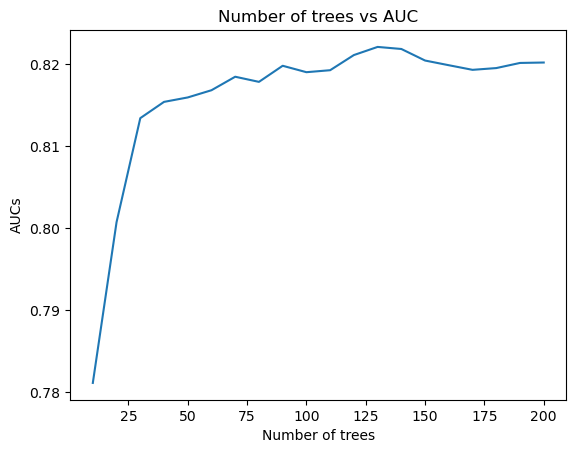

In [175]:
plt.plot(range(10, 201, 10), aucs)
plt.title('Number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUCs')

Parameter tuning for Random Forest

In [176]:
all_aucs = {}

In [178]:
for depth in [5, 10, 20]:
    print(f'depth: {depth}')
    aucs = []
    for i in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=i, random_state=3, max_depth=depth)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print(f'{i} -> {auc}')
        aucs.append(auc)
    all_aucs[depth] = aucs
    print()

depth: 5
10 -> 0.7886827637984064
20 -> 0.7939381463272868
30 -> 0.802123949528953
40 -> 0.8023025598798769
50 -> 0.8061653871303673
60 -> 0.8051784892591606
70 -> 0.8068253372405608
80 -> 0.806189605483035
90 -> 0.8065044440677145
100 -> 0.8052450897289966
110 -> 0.8051603254946599
120 -> 0.8070614661790706
130 -> 0.8067103000653896
140 -> 0.8060140224261946
150 -> 0.8060624591315299
160 -> 0.8072612675885786
170 -> 0.8069282652393983
180 -> 0.8071583395897411
190 -> 0.8071038482962389
200 -> 0.8069101014748976

depth: 10
10 -> 0.7963811726526361
20 -> 0.8174814124143275
30 -> 0.8181413625245211
40 -> 0.8217801700128358
50 -> 0.821211038725146
60 -> 0.8225430481218667
70 -> 0.8230274151752199
80 -> 0.8207629992007942
90 -> 0.8212413116659805
100 -> 0.8215137681334915
110 -> 0.8222584824780219
120 -> 0.8234209634060691
130 -> 0.8225127751810322
140 -> 0.8227610132958756
150 -> 0.8214653314281563
160 -> 0.8213563488411517
170 -> 0.8215258773098254
180 -> 0.8224159017703616
190 -> 0.8231

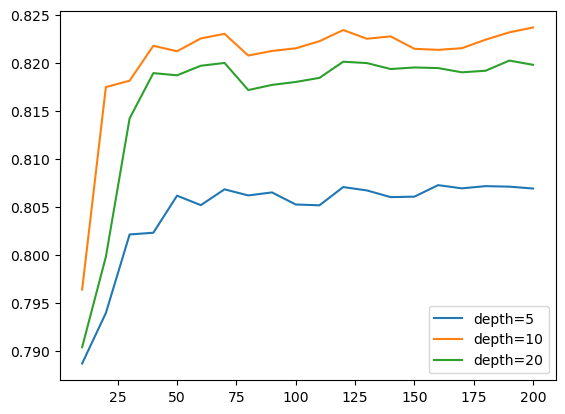

In [188]:
num_trees = list(range(10, 201, 10))
plt.plot(num_trees, all_aucs[5], label='depth=5')
plt.plot(num_trees, all_aucs[10], label='depth=10')
plt.plot(num_trees, all_aucs[20], label='depth=20')
plt.legend()

In [189]:
# with max_depth=10, AUC goes over 82%. Let us tune
# min_samples_leaf with max_depth=10 from the previous step
for m in [3, 5, 10]:
    print(f'min_samples_leaf: {m}')
    aucs = []
    for i in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=i, random_state=3, max_depth=10, min_samples_leaf=m)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print(f'{i} -> {auc}')
        aucs.append(auc)
    all_aucs[m] = aucs
    print()

min_samples_leaf: 3
10 -> 0.8115963527160881
20 -> 0.8226823036497057
30 -> 0.8294028965149789
40 -> 0.8286581821704487
50 -> 0.8278165944152479
60 -> 0.8253887045603157
70 -> 0.8245592259814487
80 -> 0.8239598217529243
90 -> 0.8231242885858903
100 -> 0.8230637427042212
110 -> 0.8232272165847279
120 -> 0.8231848344675594
130 -> 0.8237297474025818
140 -> 0.8223614104768594
150 -> 0.8225006660046984
160 -> 0.822736794943208
170 -> 0.8229123780000484
180 -> 0.8230879610568889
190 -> 0.8232151074083941
200 -> 0.8231908890557265

min_samples_leaf: 5
10 -> 0.8121775931801118
20 -> 0.8196005182727472
30 -> 0.8212836937831489
40 -> 0.8235420551694074
50 -> 0.8242686057494369
60 -> 0.8248801191542953
70 -> 0.8266722772517013
80 -> 0.825715652321329
90 -> 0.8255824513816571
100 -> 0.8249406650359642
110 -> 0.8255582330289895
120 -> 0.8252191760916423
130 -> 0.825170739386307
140 -> 0.8253644862076481
150 -> 0.8257883073793322
160 -> 0.8260728730231769
170 -> 0.8260789276113439
180 -> 0.825812525

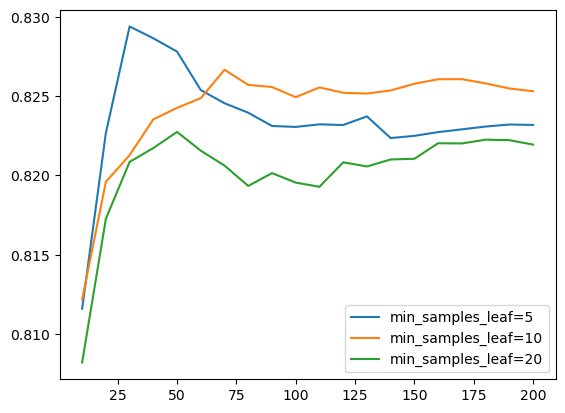

In [190]:
num_trees = list(range(10, 201, 10))
plt.plot(num_trees, all_aucs[3], label='min_samples_leaf=5')
plt.plot(num_trees, all_aucs[5], label='min_samples_leaf=10')
plt.plot(num_trees, all_aucs[10], label='min_samples_leaf=20')
plt.legend()

The best parameter for random forest for this problem seems to be max_depth=10 and min_samples_leaf=5

In [191]:
# we achieved the best AUC with 200 trees, so we should set 
# the n_estimators=200
rf = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_leaf=5, random_state=3)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=200,
                       random_state=3)

In [192]:
y_pred = rf.predict_proba(X_val)[:, 1]
y_pred

array([0.136891  , 0.03995756, 0.30238692, 0.23866987, 0.0871555 ,
       0.15250214, 0.05320954, 0.59976554, 0.23859649, 0.00770171,
       0.25079375, 0.50535735, 0.37357245, 0.10865367, 0.30835667,
       0.61211554, 0.10384479, 0.48509027, 0.05541057, 0.26727731,
       0.03916895, 0.20849015, 0.02291182, 0.39159335, 0.66723522,
       0.32942867, 0.6586161 , 0.20930813, 0.70336283, 0.06314629,
       0.8063084 , 0.31931477, 0.26940682, 0.34356454, 0.01663868,
       0.03672811, 0.90591794, 0.50607504, 0.57070735, 0.54464715,
       0.10497018, 0.82534281, 0.02925657, 0.42624265, 0.04031713,
       0.03255525, 0.61608359, 0.03476785, 0.12362528, 0.08737759,
       0.01205111, 0.26580287, 0.05202115, 0.36616609, 0.45086708,
       0.15827594, 0.0084116 , 0.22890862, 0.06276063, 0.04364892,
       0.03742583, 0.12683714, 0.30922175, 0.3200795 , 0.11878439,
       0.31054311, 0.32530044, 0.06700599, 0.08576614, 0.10723211,
       0.11002141, 0.07199223, 0.02627508, 0.06556981, 0.24181

In [193]:
roc_auc_score(y_val, y_pred)

0.8247166452737884

Gradient boosting

In [195]:
import xgboost as xgb

In [196]:
dtrain = xgb.DMatrix(
    X_train, label=y_train,
    feature_names=dv.feature_names_
)
dtrain

In [197]:
dval = xgb.DMatrix(
    X_val,
    label=y_val,
    feature_names=dv.feature_names_
)
dval

In [198]:
# most important parameter is objective: it specifies the 
# learning task. We are solving a binary classification problem.
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'nthread': 8,
    'seed': 1,
    'silent': 1
}

In [199]:
# xgb_params: parameters for training
# dtrain: the dataset for training (an instance of DMatrix)
# num_boost_round=10: the number of trees to train
model = xgb.train(
    xgb_params, dtrain, num_boost_round=10
)
model

[17:31:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.



In [200]:
# to evalutate the model, we need to make a prediction on the
# validation dataset
y_pred = model.predict(dval)
y_pred

array([0.08926772, 0.0468099 , 0.09692743, 0.17261842, 0.05435968,
       0.12576081, 0.08033007, 0.61870354, 0.486538  , 0.04056795,
       0.17517005, 0.62189645, 0.5297428 , 0.07776041, 0.16483201,
       0.79829365, 0.07249691, 0.6842603 , 0.06852661, 0.31414455,
       0.06462585, 0.32278952, 0.05878764, 0.39525822, 0.5182789 ,
       0.11134427, 0.6883214 , 0.1505679 , 0.76725644, 0.04082454,
       0.8889134 , 0.33606657, 0.23066957, 0.47511232, 0.04165092,
       0.04085815, 0.88967437, 0.5634839 , 0.26742017, 0.7305126 ,
       0.11007789, 0.8559642 , 0.07863586, 0.5492019 , 0.05411167,
       0.03366492, 0.5001199 , 0.03741197, 0.13945737, 0.16777565,
       0.04419041, 0.1847458 , 0.05965295, 0.41278166, 0.53473985,
       0.12220522, 0.03110003, 0.23713005, 0.05129844, 0.07587688,
       0.08706387, 0.1566342 , 0.14094234, 0.32264814, 0.12290021,
       0.47798058, 0.32882994, 0.09538577, 0.13444112, 0.06950612,
       0.05668955, 0.07587893, 0.05555102, 0.08185372, 0.25377

In [201]:
y_pred[:10] # the risk score for each customer in the validation dataset

array([0.08926772, 0.0468099 , 0.09692743, 0.17261842, 0.05435968,
       0.12576081, 0.08033007, 0.61870354, 0.486538  , 0.04056795],
      dtype=float32)

In [202]:
roc_auc_score(y_val, y_pred)

0.8152745150274878

Model performance monitoring

In [203]:
# to get an idea of AUC changes as the number of trees grows,
# we can use a watchlist - a built-in feature in XGBoost for
# monitoring model performance
watchlist = [
    (dtrain, 'train'),
    (dval, 'val')
]

In [204]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'silent': 1
}

In [211]:
%%capture output
# to use the watchlist during training, we need to specify
# two extra arguments for the train function:
# evals: the watchlist
# verbose_eval: how often we print the metric. If we set it to "10"
# we see the result after each 10th step.
model = xgb.train(
    xgb_params, dtrain, num_boost_round=100,
    evals=watchlist, verbose_eval=10
)
model

Parameter tuning for XGBoost    

In [236]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'silent': 1 
}

In [237]:
# previously we used 100 iterations, but this may not be enought
# for smaller eta. So let us use 500 rounds for training
model = xgb.train(
    xgb_params, dtrain, num_boost_round=500,
    verbose_eval=10, evals=watchlist
)

[09:38:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	train-auc:0.86300	val-auc:0.76818
[10]	train-auc:0.91558	val-auc:0.80009
[20]	train-auc:0.93933	val-auc:0.80920
[30]	train-auc:0.95411	val-auc:0.81557
[40]	train-auc:0.96332	val-auc:0.81843
[50]	train-auc:0.97014	val-auc:0.82348
[60]	train-auc:0.97641	val-auc:0.82446
[70]	train-auc:0.98124	val-auc:0.82477
[80]	train-auc:0.98567	val-auc:0.82329
[90]	train-auc:0.98818	val-auc:0.82363
[100]	train-auc:0.99056	val-auc:0.82371
[110]	train-auc:0.99305	val-auc:0.82355
[120]	train-auc:0.99434	val-auc:0.82208
[130]	train-auc:0.99510	val-auc:0.82079
[140]	train-auc:0.99606	val-auc:0.82025
[150]	train-auc:0.99690	val-auc:0.81946
[160]	train-auc:0.99741	val-auc:0.81907
[170]	train-auc:0.99794	val-auc:0.81839
[180]	train-auc:0.99832	val-auc:0.81830
[190]	train-auc:0.99874	val-auc:0.81711
[200]	train-auc

In [238]:
# When eta is 0.3, we get the best AUC pretty quickly, but then
# it starts to overfit. After the 30th iteration, the performance
# on the validation set goes down
# When eta is 0.1, AUC grows more slowly but peaks at a higher value.
# For smaller learning rate, it takes more trees to reach the peak, but
# we could achieve better performance

Tuning other parameters

In [239]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'silent': 1 
}

In [240]:
model = xgb.train(
    xgb_params, dtrain, num_boost_round=500,
    verbose_eval=10, evals=watchlist
)

[09:45:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	train-auc:0.77424	val-auc:0.73571
[10]	train-auc:0.84733	val-auc:0.78964
[20]	train-auc:0.86359	val-auc:0.80617
[30]	train-auc:0.87855	val-auc:0.81478
[40]	train-auc:0.88701	val-auc:0.81990
[50]	train-auc:0.89458	val-auc:0.82595
[60]	train-auc:0.90159	val-auc:0.82806
[70]	train-auc:0.90650	val-auc:0.82801
[80]	train-auc:0.91110	val-auc:0.82940
[90]	train-auc:0.91428	val-auc:0.82997
[100]	train-auc:0.91801	val-auc:0.83221
[110]	train-auc:0.92205	val-auc:0.83290
[120]	train-auc:0.92460	val-auc:0.83285
[130]	train-auc:0.92843	val-auc:0.83414
[140]	train-auc:0.93100	val-auc:0.83463
[150]	train-auc:0.93296	val-auc:0.83525
[160]	train-auc:0.93551	val-auc:0.83554
[170]	train-auc:0.93788	val-auc:0.83638
[180]	train-auc:0.93971	val-auc:0.83657
[190]	train-auc:0.94203	val-auc:0.83562
[200]	train-auc

In [241]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 10,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'silent': 1 
}

In [242]:
model = xgb.train(
    xgb_params, dtrain, num_boost_round=500,
    verbose_eval=10, evals=watchlist
)

[09:46:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	train-auc:0.91622	val-auc:0.76613
[10]	train-auc:0.97570	val-auc:0.81168
[20]	train-auc:0.99108	val-auc:0.80901
[30]	train-auc:0.99741	val-auc:0.80641
[40]	train-auc:0.99922	val-auc:0.81045
[50]	train-auc:0.99980	val-auc:0.81009
[60]	train-auc:0.99996	val-auc:0.81102
[70]	train-auc:0.99999	val-auc:0.81013
[80]	train-auc:1.00000	val-auc:0.80991
[90]	train-auc:1.00000	val-auc:0.81114
[100]	train-auc:1.00000	val-auc:0.81169
[110]	train-auc:1.00000	val-auc:0.81055
[120]	train-auc:1.00000	val-auc:0.81075
[130]	train-auc:1.00000	val-auc:0.81117
[140]	train-auc:1.00000	val-auc:0.81065
[150]	train-auc:1.00000	val-auc:0.81078
[160]	train-auc:1.00000	val-auc:0.81108
[170]	train-auc:1.00000	val-auc:0.81091
[180]	train-auc:1.00000	val-auc:0.81051
[190]	train-auc:1.00000	val-auc:0.81040
[200]	train-auc

The best the random forest model was able to get 82.5% AUC,
whereas the best gradient boosting model could get was 1% more (83.6%)
Gradient boosting is the best model, so let us use it as out final model - scoring loan applications

Testing the final model

In [243]:
y_train = (df_train_full.status == 'default').values
y_test = (df_test.status == 'default').values

In [244]:
del df_train_full['status']
del df_test['status']

In [245]:
dict_train = df_train_full.fillna(0).to_dict(orient='records')
dict_test = df_test.fillna(0).to_dict(orient='records')

In [246]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(dict_train)
X_test = dv.transform(dict_test)

In [247]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=dv.feature_names_)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=dv.feature_names_)
 
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
 
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'silent': 1
}
 
num_trees = 160
 
model = xgb.train(xgb_params, dtrain, num_boost_round=num_trees)

[10:02:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.



In [248]:
y_pred_xgb = model.predict(dtest)

In [249]:
roc_auc_score(y_test, y_pred_xgb)

0.8322845901959826

In [250]:
# The output is 83.2%. It means that out model does not overfit and can
# work well with customers it has not seen.